In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [3]:
car=pd.read_csv(r"C:\Users\mruna\Predictive models\CarPrices\CarPrice_Assignment.csv")

In [5]:
car.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [6]:
x_train=np.array(car['carlength'])
y_train=np.array(car['price'])

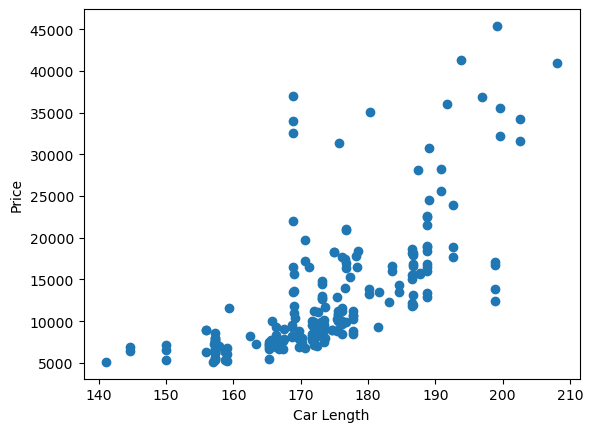

In [7]:
plt.scatter(x_train,y_train)
plt.xlabel("Car Length")
plt.ylabel("Price")
plt.show()

In [8]:
def CostFunction(x,y,w,b):
    m=len(x)
    f=w*x+b
    error=f-y
    cost = (1/(2*m)) * np.sum(error**2) 
    return cost

In [9]:
def Derivative(x,y,w,b):
    m=len(x)
    
    f=w*x+b
    error=f-y
    
    derv_w=(1/m)*np.sum(error*x)
    derv_b=(1/m)*np.sum(error)
    
    return derv_w,derv_b

In [10]:
def Gradient_Descent(x, y, alpha, iterations):
    w=0
    b=0
    for i in range(iterations):
        derv_w,derv_b=Derivative(x,y,w,b)
        
        w=w-alpha*derv_w
        b=b-alpha*derv_b
    
    return w,b

In [11]:
#mean feature scaling
x_scal= (x_train - np.mean(x_train)) / np.std(x_train)
y_scal= (y_train - np.mean(y_train)) / np.std(y_train)

In [13]:
#z-score feature scaling
"""
mean_x=x_train.mean()
sigma_x=x_train.std()
x_scal=(x_train-mean_x)/sigma_x

mean_y=y_train.mean()
sigma_y=y_train.std()
y_scal=(y_train-mean_y)/sigma_y
"""

'\nmean_x=x_train.mean()\nsigma_x=x_train.std()\nx_scal=(x_train-mean_x)/sigma_x\n\nmean_y=y_train.mean()\nsigma_y=y_train.std()\ny_scal=(y_train-mean_y)/sigma_y\n'

In [12]:
learning_rate = 0.001
iterations = 100000
final_w, final_b = Gradient_Descent(x_scal, y_scal, learning_rate, iterations)
print(f" w: {final_w:.4f}, b: {final_b:.4f}")

 w: 0.6829, b: -0.0000


In [13]:
CostFunction(x_scal,y_scal,final_w, final_b)

0.26681012609320587

In [14]:
x=175 #car length
y_hat=final_w*x+final_b
print(y_hat)

119.5110027436337


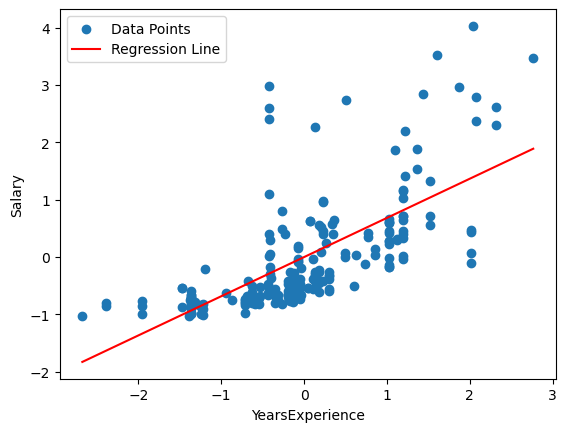

In [15]:
plt.scatter(x_scal, y_scal, label='Data Points')

x_vals = np.linspace(min(x_scal), max(x_scal), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [16]:
x=int(input())
x_scal= (x - np.mean(x_train)) / np.std(x_train)
y_pred_scal = final_w * x_scal + final_b
y_pred = y_pred_scal * y_train.std() + y_train.mean()
print(f"Prediction price is: ${y_pred:.4f}")


Prediction price is: $15908.2197
